## 1. First version with a combined distance matrix


Model not effective enough, isn't able to find a solution because it costs too much

In [ ]:
!pip install python-Levenshtein
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
import Levenshtein
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import io

# Montage du drive
from google.colab import drive
drive.mount('/content/drive')

# Exemple de données (chaînes + images)
sequences = ["ACTG", "ACGT", "TGCA", "AGTG", "ACGG"]
image_paths = [
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden.jpeg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden2.webp"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden3.webp"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden4.jpeg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden5.jpg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden6.jpg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden7.webp"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german1.webp"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german2.jpeg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german3.jpg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german4.jpeg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german5.png"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german6.webp"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german7.jpg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree.jpg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree2.jpeg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree3.jpg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree4.webp"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree5.jpg"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree6.webp"},
    {"image_path": "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree7.webp"}
]

# Fonction pour extraire descripteurs HOG d'une image
def image_to_sequence(image_path):
    image = io.imread(image_path)
    gray_image = rgb2gray(image)
    features, _ = hog(
        gray_image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True
    )
    return features  # Retourne une séquence numérique

# Créer une représentation mixte (séquences + images)
image_sequences = [image_to_sequence(path['image_path']) for path in image_paths]

# Calcul de la distance de Levenshtein étendue
def extended_levenshtein(seq1, seq2):
    n, m = len(seq1), len(seq2)
    dp = np.zeros((n + 1, m + 1))

    for i in range(n + 1):
        for j in range(m + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            else:
                cost = (
                    np.linalg.norm(seq1[i - 1] - seq2[j - 1])
                    if isinstance(seq1[0], np.ndarray)
                    else int(seq1[i - 1] != seq2[j - 1])
                )
                dp[i][j] = min(
                    dp[i - 1][j] + 1,     # Suppression
                    dp[i][j - 1] + 1,     # Insertion
                    dp[i - 1][j - 1] + cost,  # Substitution
                )
    return dp[n][m]

# Créer une matrice de distance combinée
#Calculer une matrice de distance pour de grands ensembles peut être coûteux.
#Solution : Approximation avec des méthodes comme locality-sensitive hashing (LSH)

all_data = sequences + image_sequences
distance_matrix = np.zeros((len(all_data), len(all_data)))

for i in range(len(all_data)):
    for j in range(i + 1, len(all_data)):
        dist = extended_levenshtein(all_data[i], all_data[j])
        distance_matrix[i][j] = dist
        distance_matrix[j][i] = dist

# Clustering avec DBSCAN
clustering = DBSCAN(eps=5, min_samples=2, metric="precomputed")
clusters = clustering.fit_predict(distance_matrix)

# Résultats
print("Matrice de distances :\n", distance_matrix)
print("Clusters attribués :", clusters)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.9 MB/s eta 0:00:00
Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## 2. Second version with LSH (approximation)

DNA Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Image Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


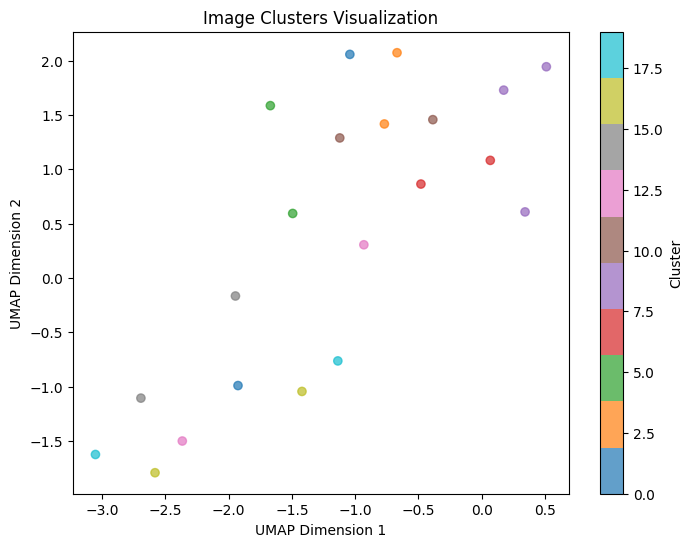

In [20]:
!pip install python-Levenshtein datasketch scikit-image umap-learn

import numpy as np
import random
import Levenshtein
from datasketch import MinHash, MinHashLSH
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from multiprocessing import Pool
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import io
import matplotlib.pyplot as plt
from umap import UMAP

# ------------------------- DNA SEQUENCE PROCESSING -------------------------

# Generate synthetic DNA sequences
def generate_dna_sequences(num_sequences, length=100):
    bases = ['A', 'C', 'G', 'T']
    return [''.join(random.choices(bases, k=length)) for _ in range(num_sequences)]

# Use a smaller subset for testing
dna_sequences = generate_dna_sequences(100, length=100)

# Function to create MinHash signature for LSH
def get_minhash(sequence, num_perm=128):
    minhash = MinHash(num_perm=num_perm)
    for char in sequence:
        minhash.update(char.encode('utf8'))
    return minhash

# Create an LSH index for DNA sequences
lsh_dna = MinHashLSH(threshold=0.8, num_perm=128)
minhashes_dna = {}

for idx, seq in enumerate(dna_sequences):
    minhash = get_minhash(seq)
    lsh_dna.insert(f"dna_{idx}", minhash)
    minhashes_dna[f"dna_{idx}"] = minhash

# Find LSH candidate matches
candidates = {}
for idx in range(len(dna_sequences)):
    key = f"dna_{idx}"
    matches = lsh_dna.query(minhashes_dna[key])
    candidates[key] = matches

# Parallelized Levenshtein Distance Calculation
def compute_distance(pair):
    i, j = pair
    return i, j, Levenshtein.distance(dna_sequences[i], dna_sequences[j])

pairs = []
for i in range(len(dna_sequences)):
    key_i = f"dna_{i}"
    for key_j in candidates[key_i]:
        j = int(key_j.split('_')[1])
        if i != j:
            pairs.append((i, j))

# Initialize distance matrix with zeros
distance_matrix = np.zeros((len(dna_sequences), len(dna_sequences)))

# Use multiprocessing to compute distances in parallel
with Pool(processes=4) as pool:  # Adjust for system cores
    results = pool.map(compute_distance, pairs)

# Fill the distance matrix
for i, j, dist in results:
    distance_matrix[i][j] = dist
    distance_matrix[j][i] = dist

# Normalize the distance matrix to ensure non-negative values for DBSCAN
distance_matrix = np.clip(distance_matrix, 0, None)
scaler = MinMaxScaler()
distance_matrix = scaler.fit_transform(distance_matrix)

# Run DBSCAN clustering with adjusted parameters
clustering_dna = DBSCAN(eps=0.7, min_samples=1, metric="precomputed")
dna_clusters = clustering_dna.fit_predict(distance_matrix)

print("DNA Clusters:", np.unique(dna_clusters))

# ------------------------- IMAGE PROCESSING -------------------------

image_paths = [
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden.jpeg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden2.webp",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden3.webp",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden4.jpeg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden5.jpg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden6.jpg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/golden7.webp",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german1.webp",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german2.jpeg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german3.jpg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german4.jpeg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german5.png",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german6.webp",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/german7.jpg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree.jpg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree2.jpeg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree3.jpg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree4.webp",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree5.jpg",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree6.webp",
    "/content/drive/My Drive/Colab Notebooks/Projet 3A/6. Unsupervised method/image/tree7.webp"
]

# Function to extract HOG descriptors from images with resizing
def extract_hog_features(image_path, target_size=(128, 128)):
    image = io.imread(image_path)
    image_resized = resize(image, target_size, anti_aliasing=True)
    gray_image = rgb2gray(image_resized)
    features, _ = hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    return features

# Extract and normalize image features
image_features = np.array([extract_hog_features(img_path) for img_path in image_paths])
scaled_features = np.array(image_features)

# Normalize image features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scaled_features)

# Clustering image features with adjusted parameters
clustering_images = DBSCAN(eps=0.7, min_samples=1)
image_clusters = clustering_images.fit_predict(scaled_features)

print("Image Clusters:", np.unique(image_clusters))

# Adjust neighbors based on available data
n_neighbors = max(2, min(3, len(scaled_features) - 1))

# Ensure data is dense before passing to UMAP
scaled_features = np.asarray(scaled_features)

# UMAP Dimensionality Reduction with adjusted parameters
umap = UMAP(n_components=2, n_neighbors=n_neighbors, init="random", random_state=42)
reduced_features = umap.fit_transform(scaled_features)

# Plotting the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=image_clusters, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Image Clusters Visualization")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()
